In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_data(train_dir, val_dir, test_dir, img_size=(224, 224), batch_size=32):
    """
    Loads train, validation, and test datasets from separate folders.
    """

    # Augmentation for training data
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=30,
        zoom_range=0.2,
        horizontal_flip=True
    )

    # Only rescale for validation and test
    val_test_datagen = ImageDataGenerator(rescale=1.0/255)

    # Train generator
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    # Validation generator
    val_generator = val_test_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    # Test generator
    test_generator = val_test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

    return train_generator, val_generator, test_generator


In [4]:
train_path = r"C:\Users\Ojas\Downloads\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\train"
val_path   = r"C:\Users\Ojas\Downloads\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\val"
test_path  = r"C:\Users\Ojas\Downloads\Dataset\images.cv_jzk6llhf18tm3k0kyttxz\data\test"

train_gen, val_gen, test_gen = load_data(train_path, val_path, test_path, img_size=(224, 224), batch_size=32)

print("Training samples:", train_gen.samples)
print("Validation samples:", val_gen.samples)
print("Test samples:", test_gen.samples)
print("Classes:", train_gen.class_indices)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Training samples: 6225
Validation samples: 1092
Test samples: 3187
Classes: {'animal fish': 0, 'animal fish bass': 1, 'fish sea_food black_sea_sprat': 2, 'fish sea_food gilt_head_bream': 3, 'fish sea_food hourse_mackerel': 4, 'fish sea_food red_mullet': 5, 'fish sea_food red_sea_bream': 6, 'fish sea_food sea_bass': 7, 'fish sea_food shrimp': 8, 'fish sea_food striped_red_mullet': 9, 'fish sea_food trout': 10}


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [6]:
num_classes = len(train_gen.class_indices)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [7]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


Epoch 1/5
195/195 [==============================] - 765s 4s/step - loss: 1.7391 - accuracy: 0.3966 - val_loss: 1.2607 - val_accuracy: 0.6355
Epoch 2/5
195/195 [==============================] - 636s 3s/step - loss: 1.2637 - accuracy: 0.5677 - val_loss: 1.0432 - val_accuracy: 0.6603
Epoch 3/5
195/195 [==============================] - 672s 3s/step - loss: 1.0212 - accuracy: 0.6493 - val_loss: 0.8408 - val_accuracy: 0.7289
Epoch 4/5
195/195 [==============================] - 1596s 8s/step - loss: 0.8719 - accuracy: 0.7099 - val_loss: 0.6320 - val_accuracy: 0.8168
Epoch 5/5
195/195 [==============================] - 770s 4s/step - loss: 0.7627 - accuracy: 0.7449 - val_loss: 0.5035 - val_accuracy: 0.8535


In [9]:
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


100/100 [==============================] - 90s 894ms/step - loss: 0.4875 - accuracy: 0.8572
Test Accuracy: 0.8572
Test Loss: 0.4875


In [14]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


100/100 [==============================] - 57s 567ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.77      0.99      0.86       298
   fish sea_food gilt_head_bream       0.75      0.78      0.77       305
   fish sea_food hourse_mackerel       0.93      0.79      0.86       286
        fish sea_food red_mullet       0.99      0.95      0.97       291
     fish sea_food red_sea_bream       0.93      0.60      0.73       273
          fish sea_food sea_bass       0.85      0.75      0.80       327
            fish sea_food shrimp       0.86      0.94      0.90       289
fish sea_food striped_red_mullet       0.73      0.77      0.75       293
             fish sea_food trout       0.80      0.94      0.86       292

                        accuracy                    

D:\Users\Ojas\anaconda3\envs\tf310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Users\Ojas\anaconda3\envs\tf310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\Users\Ojas\anaconda3\envs\tf310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

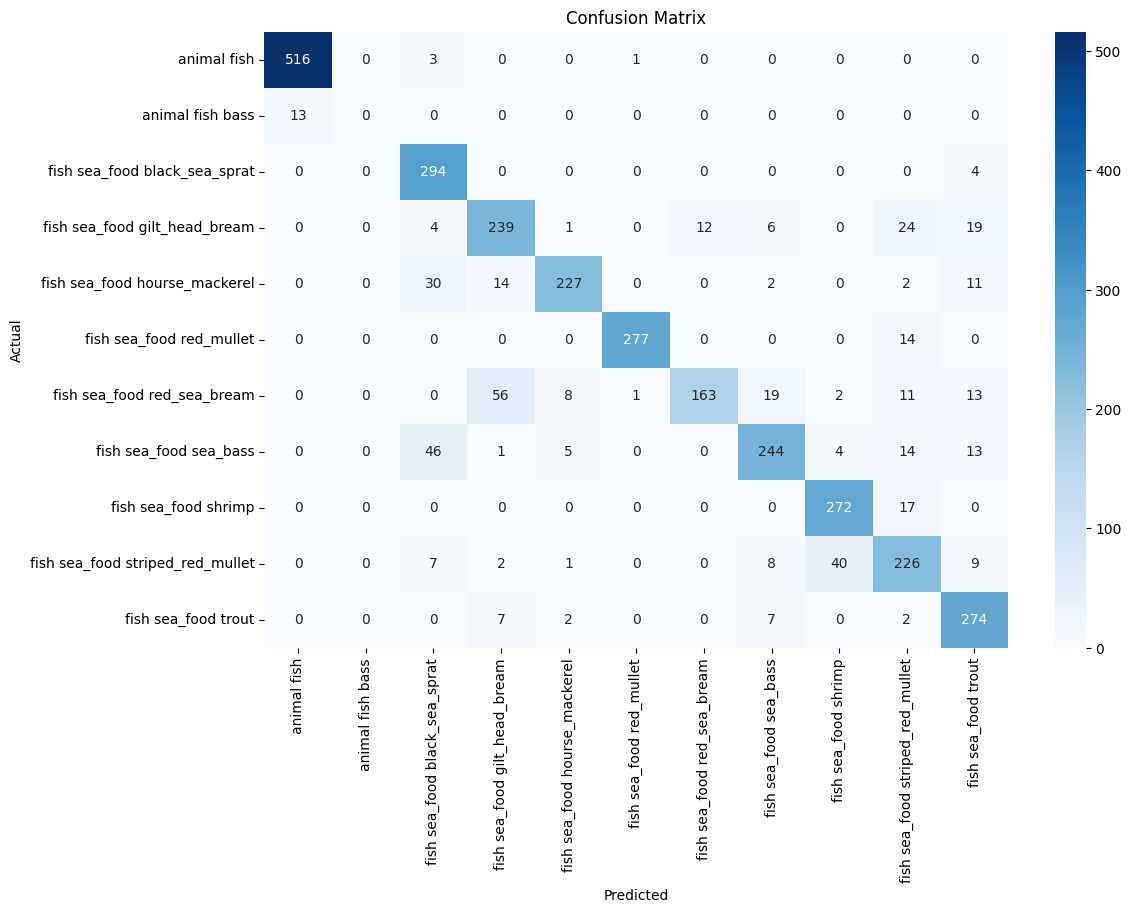

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


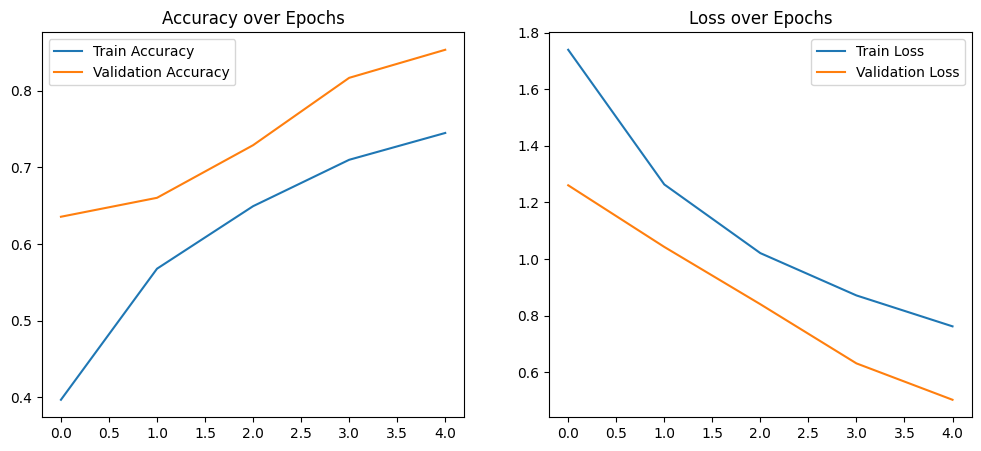

In [18]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()


In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image


In [23]:
# Path to your test image (change this to your file path)
img_path = r"0BJD9F3STSQ7.jpg"

# Load the image with same size used in training
img = image.load_img(img_path, target_size=(224, 224))

# Convert to array and scale values
img_array = image.img_to_array(img) / 255.0

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)


In [24]:
# Predict probabilities
predictions = model.predict(img_array)

# Get predicted class index
predicted_class_index = np.argmax(predictions)

# Get class labels from the generator
class_labels = list(train_gen.class_indices.keys())

# Predicted class name
predicted_class_name = class_labels[predicted_class_index]

print(f"Predicted Class: {predicted_class_name}")
print(f"Prediction Confidence: {np.max(predictions)*100:.2f}%")


1/1 [==============================] - 0s 68ms/step
Predicted Class: animal fish
Prediction Confidence: 100.00%


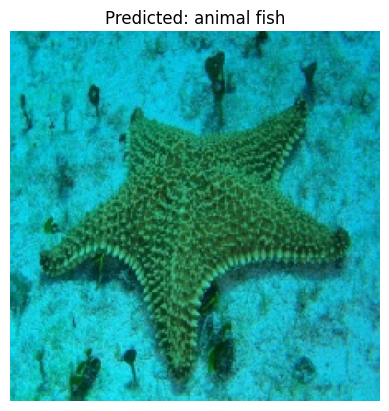

In [25]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Predicted: {predicted_class_name}")
plt.axis("off")
plt.show()
